In [23]:
import cv2
import numpy as np

# 1. 读取并预处理原图（核心：降低亮度、提升对比度）
img = cv2.imread("output.png")
if img is None:
    raise FileNotFoundError("未找到output.png文件，请确认文件路径正确")

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray_img, (1000, 500), interpolation=cv2.INTER_CUBIC)

# 步骤1：降低图像整体亮度（将接近255的像素值下压，留出溢出空间）
# 方法：像素值乘以一个小于1的系数，确保整体亮度降低
darkened_img = np.uint8(resized_img * 0.7)  # 0.7为亮度系数，可根据情况调整（0.5~0.9）

# 步骤2：提升对比度（扩大像素值分布范围，创造可锐化的边缘）
# 方法：直方图均衡化（适合整体偏亮/偏暗的图像）
equalized_img = cv2.equalizeHist(darkened_img)


# 2. 前置去噪（避免拉普拉斯放大噪声）
blurred_img = cv2.GaussianBlur(equalized_img, (3, 3), 0)

# 3. 拉普拉斯锐化（标准流程，避免信息丢失）
laplacian = cv2.Laplacian(blurred_img, cv2.CV_64F, ksize=3)
laplacian_8u = np.uint8(np.absolute(laplacian))

# 4. 加权叠加（降低权重，避免溢出）
# 降低alpha和beta的值，避免叠加后数值超出255
sharp_img = cv2.addWeighted(equalized_img, 1.0, laplacian_8u, 0.3, 0)

# 5. 保存并查看结果
cv2.imwrite("non_white_sharp_image.jpg", sharp_img)

# 查看处理后的像素矩阵信息
print("处理后图像像素形状：", sharp_img.shape)
print("处理后图像像素最小值：", np.min(sharp_img))
print("处理后图像像素最大值：", np.max(sharp_img))


处理后图像像素形状： (500, 1000)
处理后图像像素最小值： 0
处理后图像像素最大值： 255


In [24]:
print(sharp_img)

[[255 255 255 ...  30  26  25]
 [255 255 255 ...  27  26  25]
 [255 255 255 ...  26  26  25]
 ...
 [ 25  25  25 ...  25  25  25]
 [ 25  24  25 ...  25  25  24]
 [ 25  25  25 ...  25  25  25]]


In [25]:
cv2.imwrite("e.jpg", darkened_img)

True

In [26]:
cv2.imwrite("ea.jpg", equalized_img)

True

/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3189600122.py:24: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3189600122.py:24: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3189600122.py:24: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3189600122.py:24: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3189600122.py:24: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1

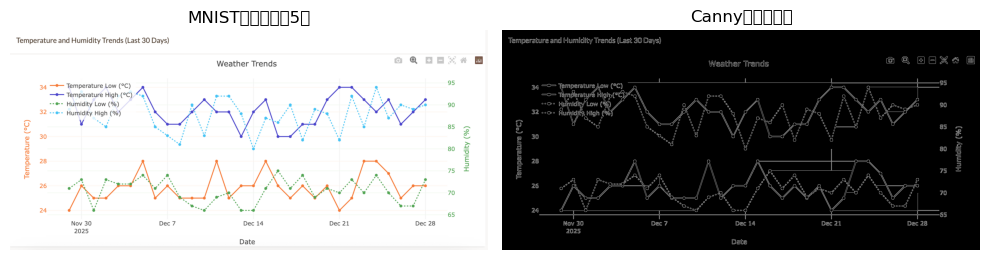

In [13]:
img=cv2.imread("output.png")
img_original = img
# 确保图像为8位无符号整数（适配Canny边缘检测和可视化）
img_original = img_original.astype(np.uint8)
# 1. 执行Canny边缘检测
# cv2.Canny参数：输入图像、低阈值、高阈值（需根据图像灰度调整）
img_canny = cv2.Canny(img_original, threshold1=50, threshold2=150)

# 2. 可视化对比原图与边缘图
plt.figure(figsize=(10, 5))

# 绘制原图
plt.subplot(1, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.title('MNIST原图（数字5）')
plt.axis('off')

# 绘制Canny边缘图
plt.subplot(1, 2, 2)
plt.imshow(img_canny, cmap='gray')
plt.title('Canny边缘检测图')
plt.axis('off')

plt.tight_layout()
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3831200730.py:36: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3831200730.py:36: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3831200730.py:36: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3831200730.py:36: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3831200730.py:36: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1

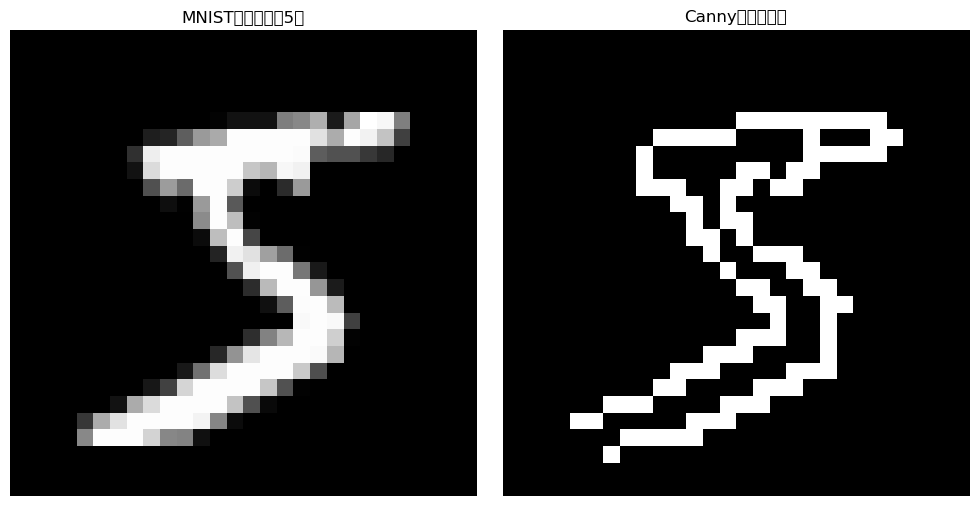

In [1]:
# 安装必要库（若未安装）
# !pip install numpy matplotlib opencv-python tensorflow keras

# 导入库
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.datasets import mnist

# 1. 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 选取单张手写数字图片（以训练集第0张为例，数字5）
img_original = x_train[0]
# 确保图像为8位无符号整数（适配Canny边缘检测和可视化）
img_original = img_original.astype(np.uint8)
# 1. 执行Canny边缘检测
# cv2.Canny参数：输入图像、低阈值、高阈值（需根据图像灰度调整）
img_canny = cv2.Canny(img_original, threshold1=50, threshold2=150)

# 2. 可视化对比原图与边缘图
plt.figure(figsize=(10, 5))

# 绘制原图
plt.subplot(1, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.title('MNIST原图（数字5）')
plt.axis('off')

# 绘制Canny边缘图
plt.subplot(1, 2, 2)
plt.imshow(img_canny, cmap='gray')
plt.title('Canny边缘检测图')
plt.axis('off')

plt.tight_layout()
plt.show()

/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3529063215.py:119: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3529063215.py:119: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3529063215.py:119: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3529063215.py:119: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1194/3529063215.py:119: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipyker

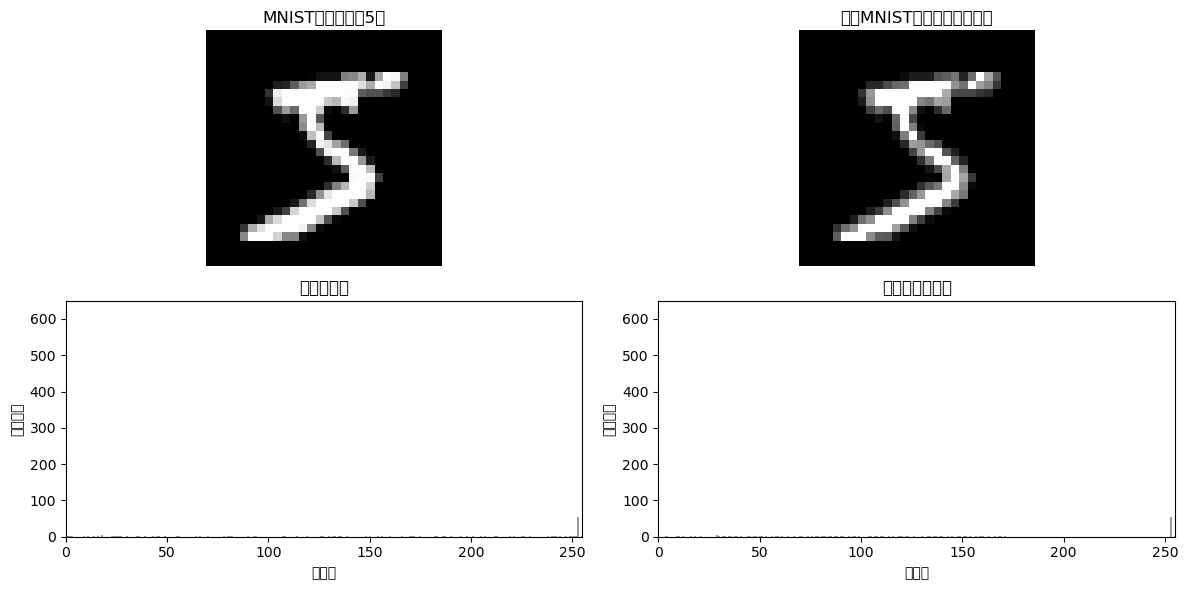

原图整体灰度方差：6343.94
均衡化后整体灰度方差：4999.71
--------------------------------------------------
原图前景局部方差（细节对比度）：8289.13
均衡化后前景局部方差（细节对比度）：7679.36
前景细节对比度提升比例：-7.36%


In [5]:
# 导入必要库
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.datasets import mnist

# 步骤1：加载MNIST数据集并初始化单张图片
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_original = x_train[0].astype(np.uint8)  # 转为uint8，适配后续处理
print(np.var(img_original))
# 步骤2：定义修正后的直方图统计与均衡化函数
def manual_histogram(img):
    """
    用NumPy手动实现灰度图像直方图统计
    参数：img - 输入灰度图像（二维数组）
    返回：hist - 直方图数组（长度256），bins - 灰度级数组（0-255）
    """
    h, w = img.shape
    gray_levels = 256
    hist = np.zeros(gray_levels, dtype=np.int64)
    
    for i in range(h):
        for j in range(w):
            gray_val = img[i, j]
            hist[gray_val] += 1
    
    bins = np.arange(gray_levels)
    return hist, bins

def manual_histogram_equalization_mnist(img):
    """
    适配MNIST图像的直方图均衡化（忽略纯黑背景，仅处理前景）
    参数：img - 输入灰度图像（二维数组，uint8类型）
    返回：img_eq - 均衡化后的图像，hist_eq - 均衡化后的直方图
    """
    h, w = img.shape
    gray_levels = 256
    img_eq = np.copy(img)  # 复制原图，保留背景不变
    
    # 步骤1：提取前景像素（灰度>0），排除纯黑背景
    foreground_pixels = img[img > 0]
    if len(foreground_pixels) == 0:
        return img_eq, manual_histogram(img_eq)[0]  # 无前景直接返回原图
    total_foreground = len(foreground_pixels)
    
    # 步骤2：统计前景像素的直方图（仅针对1~255灰度级）
    hist_foreground = np.zeros(gray_levels, dtype=np.int64)
    for val in foreground_pixels:
        hist_foreground[val] += 1
    
    # 步骤3：计算前景归一化直方图和CDF（仅处理1~255）
    hist_normalized = hist_foreground / total_foreground
    cdf = np.zeros(gray_levels, dtype=np.float64)
    
    # 从灰度1开始计算CDF（跳过背景0）
    cdf[1] = hist_normalized[1]
    for k in range(2, gray_levels):
        cdf[k] = cdf[k-1] + hist_normalized[k]
    
    # 步骤4：映射前景灰度级（缩放至1~255，避免背景被修改）
    cdf_scaled = np.zeros(gray_levels, dtype=np.uint8)
    cdf_scaled[0] = 0  # 背景保持0不变
    for k in range(1, gray_levels):
        if cdf[k] > 0:
            # 缩放至1~255区间，避免前景变为0
            cdf_scaled[k] = np.round(cdf[k] * 254) + 1
        else:
            cdf_scaled[k] = k  # 无像素的灰度级保持原值
    
    # 步骤5：仅更新前景像素的灰度值
    for i in range(h):
        for j in range(w):
            original_gray = img[i, j]
            if original_gray > 0:  # 仅处理前景
                img_eq[i, j] = cdf_scaled[original_gray]
    
    # 步骤6：计算均衡化后的直方图
    hist_eq, _ = manual_histogram(img_eq)
    return img_eq, hist_eq

# 步骤3：调用修正后的均衡化函数
img_equalized, img_eq_hist = manual_histogram_equalization_mnist(img_original)

# 步骤4：计算原图直方图
img_hist, img_bins = manual_histogram(img_original)

# 步骤5：可视化对比
plt.figure(figsize=(12, 6))



# 绘制原始直方图
plt.subplot(2, 2, 3)
plt.bar(img_bins, img_hist, width=1, color='gray', alpha=0.8)
plt.title('原始直方图')
plt.xlabel('灰度级')
plt.ylabel('像素个数')
plt.xlim(0, 255)

# 绘制均衡化后直方图
plt.subplot(2, 2, 4)
eq_bins = np.arange(256)
plt.bar(eq_bins, img_eq_hist, width=1, color='gray', alpha=0.8)
plt.title('均衡化后直方图')
plt.xlabel('灰度级')
plt.ylabel('像素个数')
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

# 步骤6：定量验证（同时计算整体方差和前景方差）
original_var = np.var(img_original)
equalized_var = np.var(img_equalized)

# 计算前景区域局部方差（更准确反映细节对比度）
original_foreground_var = np.var(img_original[img_original > 0])
equalized_foreground_var = np.var(img_equalized[img_equalized > 0])

print(f"原图整体灰度方差：{original_var:.2f}")
print(f"均衡化后整体灰度方差：{equalized_var:.2f}")
print("-" * 50)
print(f"原图前景局部方差（细节对比度）：{original_foreground_var:.2f}")
print(f"均衡化后前景局部方差（细节对比度）：{equalized_foreground_var:.2f}")
print(f"前景细节对比度提升比例：{((equalized_foreground_var - original_foreground_var) / original_foreground_var) * 100:.2f}%")

In [11]:
img_original

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
img_canny

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,
          0,   0],
       [  

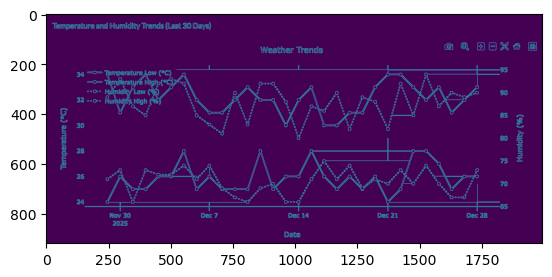

In [16]:
plt.imshow(img_canny)

In [21]:
print(cv2.version)

<module 'cv2.version' from '/Users/limengyan/anaconda3/lib/python3.11/site-packages/cv2/version.py'>


In [23]:
img_canny.tolist

<function ndarray.tolist>

In [44]:
# 读取图像（使用cv2读取，默认BGR格式，转为灰度图）
img = cv2.imread('output.png')  # 替换为你的图像路径

#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#img_original = x_train[0].astype(np.uint8)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray_img =img_original
# 查看图像形状和灰度范围
print(f"灰度图像形状：{gray_img.shape}")
print(f"原始图像灰度范围：[{gray_img.min()}, {gray_img.max()}]")

灰度图像形状：(920, 1994)
原始图像灰度范围：[60, 255]


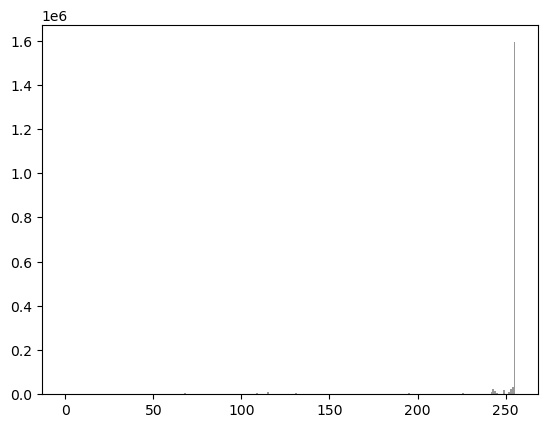

In [45]:
def calculate_histogram(image):
    """
    手动实现灰度图像直方图统计（基于NumPy）
    :param image: 输入灰度图像（二维ndarray）
    :return: 直方图（256维数组）、灰度级（0-255）
    """
    # 初始化直方图数组（对应灰度级0-255）
    hist = np.zeros(256, dtype=np.int64)
    # 获取图像像素总数
    h, w = image.shape
    total_pixels = h * w

    # 方法1：遍历统计（直观，适合理解原理）
    for i in range(h):
        for j in range(w):
            gray_level = image[i, j]
            hist[gray_level] += 1

    # 方法2：NumPy优化统计（效率更高，可选）
    # hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # 灰度级数组
    gray_levels = np.arange(256)
    return hist, gray_levels

# 计算原始图像直方图
original_hist, gray_levels = calculate_histogram(gray_img)
plt.bar(gray_levels, original_hist, width=1, color='gray', alpha=0.8)
original_contrast = np.var(gray_img)

(array([1.073000e+04, 1.249000e+03, 2.035900e+04, 1.101800e+04,
        3.906000e+03, 3.387000e+03, 9.556000e+03, 7.467000e+03,
        1.710000e+04, 1.749708e+06]),
 array([ 60. ,  79.5,  99. , 118.5, 138. , 157.5, 177. , 196.5, 216. ,
        235.5, 255. ]),
 <BarContainer object of 10 artists>)

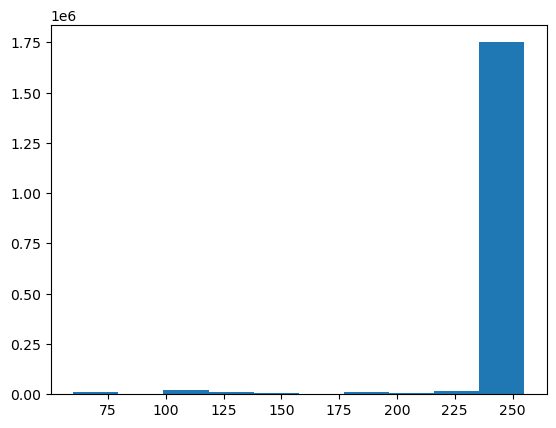

In [46]:
plt.hist(gray_img.flatten())

(array([ 177646.,   64218.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1592616.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

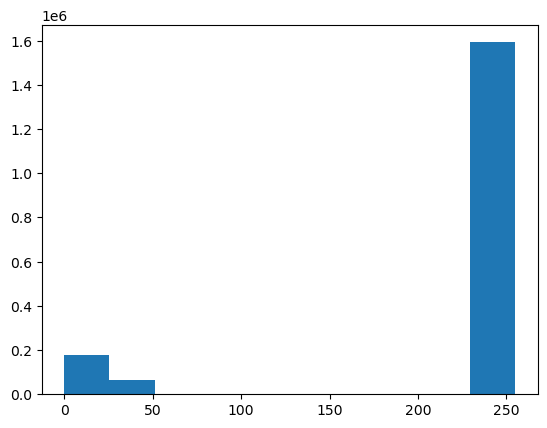

In [47]:
def histogram_equalization(image):
    """
    手动实现灰度图像直方图均衡化（基于NumPy）
    :param image: 输入灰度图像（二维ndarray）
    :return: 均衡化后的图像、灰度映射表
    """
    h, w = image.shape
    total_pixels = h * w  # 总像素数

    # 步骤1：计算原始直方图
    hist, _ = calculate_histogram(image)

    # 步骤2：计算累积分布函数（CDF）
    cdf = np.cumsum(hist)  # 累积求和
    cdf_min = cdf[cdf > 0].min()  # 获取非零最小CDF值（避免映射后灰度为0的区域过多）

    # 步骤3：构建灰度映射表（核心公式）
    # 映射公式：new_gray = round(((CDF - CDF_min) / (总像素数 - CDF_min)) * 255)
    mapping_table = np.zeros(256, dtype=np.uint8)
    for gray_level in range(256):
        if cdf[gray_level] == 0:
            mapping_table[gray_level] = 0
        else:
            normalized_cdf = (cdf[gray_level] - cdf_min) / (total_pixels - cdf_min)
            new_gray_level = np.round(normalized_cdf * 255).astype(np.uint8)
            mapping_table[gray_level] = new_gray_level

    # 步骤4：利用映射表转换原始图像
    equalized_img = mapping_table[image]

    return equalized_img, mapping_table

# 执行直方图均衡化
equalized_img, mapping_table = histogram_equalization(gray_img)
equalized_contrast = np.var(equalized_img)
plt.hist(equalized_img.flatten())

In [48]:
print(f"原始图像对比度（灰度标准差）：{original_contrast:.2f}")
print(f"均衡化后图像对比度（灰度标准差）：{equalized_contrast:.2f}")

原始图像对比度（灰度标准差）：601.99
均衡化后图像对比度（灰度标准差）：6478.04


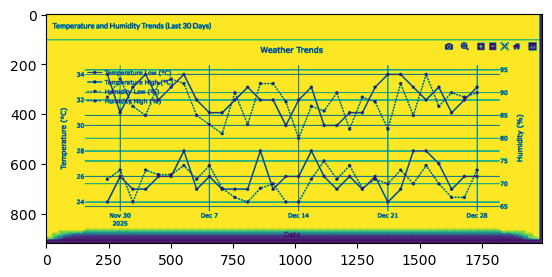

In [49]:
plt.imshow(equalized_img)